In [1]:
import librosa
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import scipy.signal as signal

In [2]:
FILENAME = "rock4.txt"
SAMPLE_RATE = 1152

In [3]:
# Open the .txt containing the sensor output
# and then store the values for plotting

with open(FILENAME, "r") as f:
  temp = f.read().splitlines()

num_points = len(temp)
data = np.zeros((2, num_points))
for c, t in enumerate(temp):
  split = t.split(',')
  data[0][c] = split[0]
  data[1][c] = split[1]
  
# Create time axis for graphs
time_axis = np.linspace(0, len(data[0]) / SAMPLE_RATE, len(data[0]))

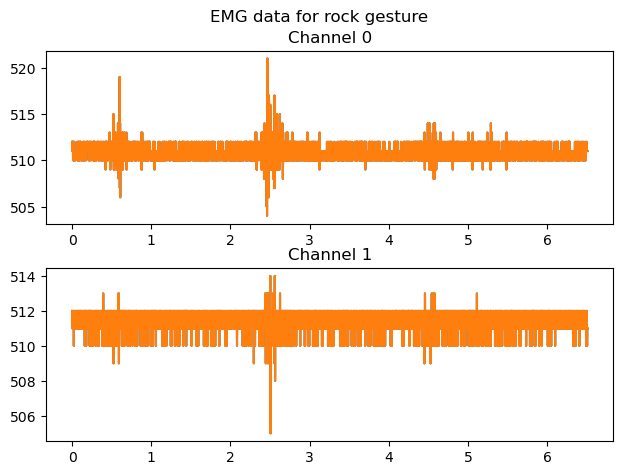

In [4]:
fig, axs = plt.subplots(len(data))
fig.suptitle('EMG data for rock gesture')
fig.tight_layout()

for c, i in enumerate(data):
  axs[c].plot(time_axis, i)
  axs[c].plot(time_axis, i)
  axs[c].set_title(f"Channel {c}")

plt.show()

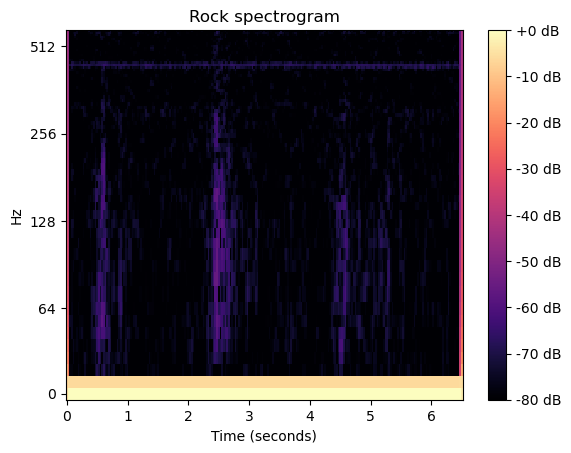

In [5]:
NFFT = 128

stft_result = librosa.stft(data[0], n_fft=NFFT)
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_result),
                                                       ref=np.max),
                               y_axis='log', x_axis='s', ax=ax, sr=SAMPLE_RATE,
                                n_fft=NFFT, hop_length=NFFT/4)
ax.set_title('Rock spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

# Applying high pass filter before STFT

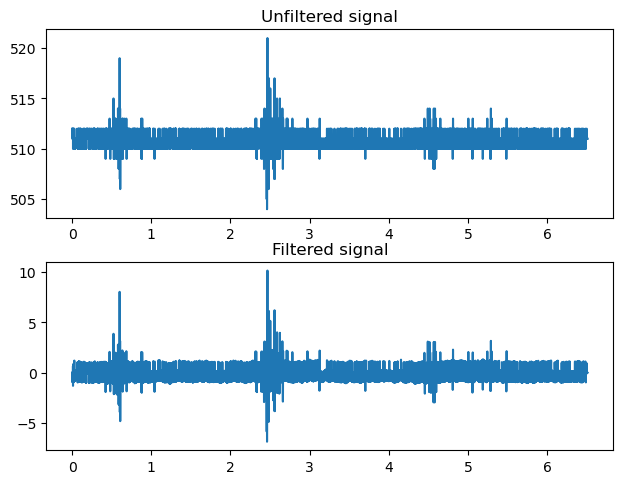

In [6]:
def highpass_filter(data, cutoff, fs, order=5):
    # nyq = 0.5 * fs
    # normal_cutoff = cutoff / nyq
    # print(normal_cutoff)
    b, a = signal.butter(order, cutoff, fs=SAMPLE_RATE, btype='highpass', analog=False)
    y = signal.filtfilt(b, a, data)
    return y


fig, axs = plt.subplots(len(data))
fig.tight_layout()
axs[0].plot(time_axis, data[0])
axs[0].set_title(f"Unfiltered signal")

filtered_signal = highpass_filter(data[0], 16, SAMPLE_RATE)
axs[1].plot(time_axis, filtered_signal)
axs[1].set_title(f"Filtered signal")
plt.show()


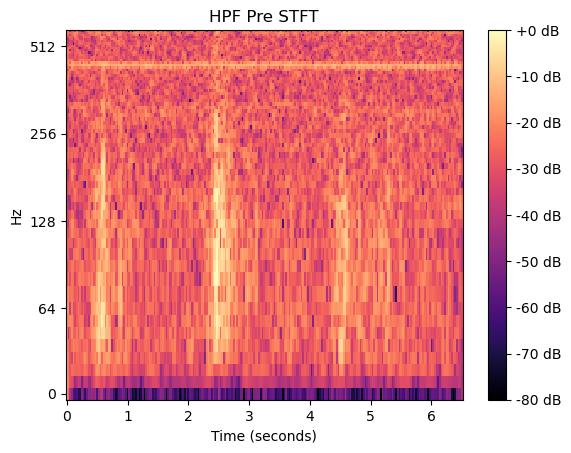

In [7]:
NFFT = 128

stft_result = librosa.stft(filtered_signal, n_fft=NFFT)
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_result),
                                                       ref=np.max),
                               y_axis='log', x_axis='s', ax=ax, sr=SAMPLE_RATE,
                                n_fft=NFFT, hop_length=NFFT/4)
ax.set_title('HPF Pre STFT')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

# Applying low pass filter before STFT

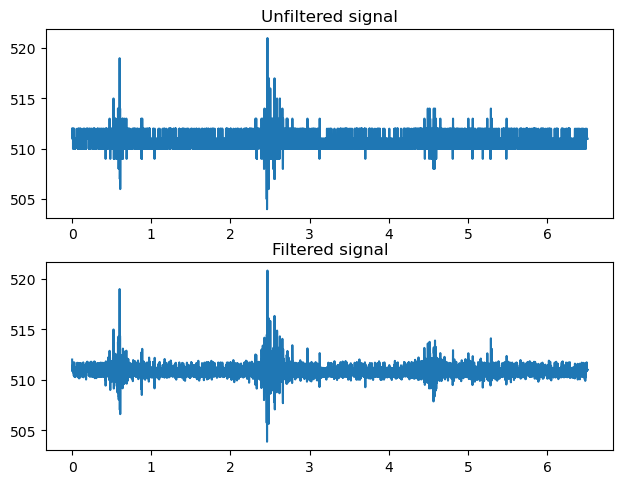

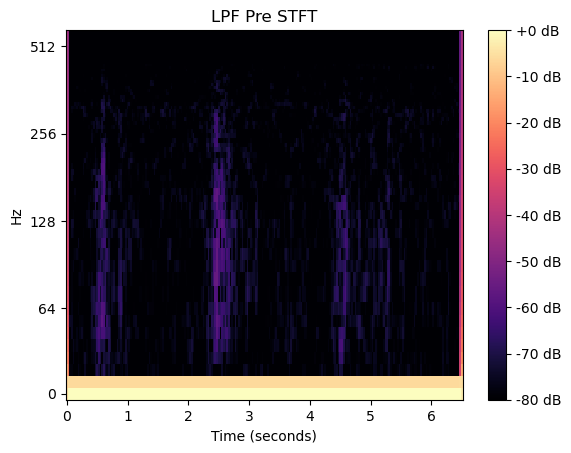

In [8]:
def lowpass_filter(data, cutoff, fs, order=5):
    # nyq = 0.5 * fs
    # normal_cutoff = cutoff / nyq
    # print(normal_cutoff)
    b, a = signal.butter(order, cutoff, fs=SAMPLE_RATE, btype='lowpass', analog=False)
    y = signal.filtfilt(b, a, data)
    return y

fig, axs = plt.subplots(len(data))
fig.tight_layout()
axs[0].plot(time_axis, data[0])
axs[0].set_title(f"Unfiltered signal")

filtered_signal = lowpass_filter(data[0], 425, SAMPLE_RATE)
axs[1].plot(time_axis, filtered_signal)
axs[1].set_title(f"Filtered signal")
plt.show()


NFFT = 128
stft_result = librosa.stft(filtered_signal, n_fft=NFFT)
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_result),
                                                       ref=np.max),
                               y_axis='log', x_axis='s', ax=ax, sr=SAMPLE_RATE,
                                n_fft=NFFT, hop_length=NFFT/4)
ax.set_title('LPF Pre STFT')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

# Looking at frequency responses for filters

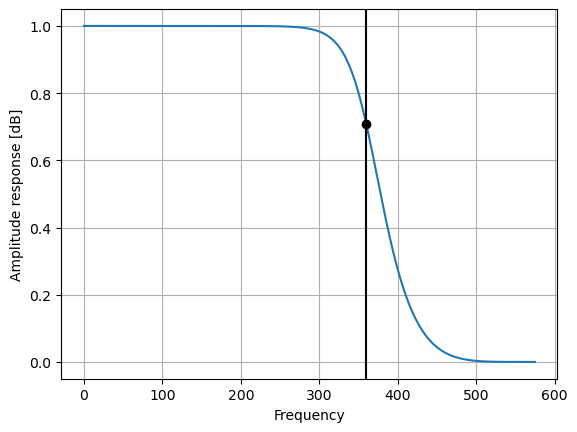

In [9]:
b, a = signal.butter(5, 360, fs=SAMPLE_RATE, btype='lowpass', analog=False)
w, h = signal.freqz(b, a, fs=SAMPLE_RATE)

plt.plot(w, np.abs(h))
plt.plot(360 , 0.5 * np.sqrt(2), 'ko')
plt.axvline(360, color='k')

plt.xlabel('Frequency')
plt.ylabel('Amplitude response [dB]')
plt.grid(True)
plt.show()

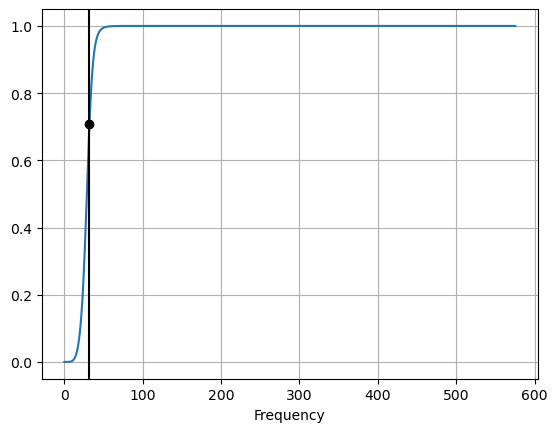

In [10]:
b, a = signal.butter(5, 32, fs=SAMPLE_RATE, btype='highpass', analog=False)
w, h = signal.freqz(b, a, fs=SAMPLE_RATE, worN=1000)
plt.plot(w, np.abs(h))

plt.plot(32 , 0.5 * np.sqrt(2), 'ko')
plt.axvline(32 , color='k')

plt.xlabel('Frequency')
plt.grid(True)
plt.show()

# Applying both filters

In [20]:
pre_filter_data = data

LOW_CUTOFF = 10
HIGH_CUTOFF = 450

filtered_signal = highpass_filter(pre_filter_data[0], LOW_CUTOFF, SAMPLE_RATE)
filtered_signal = lowpass_filter(filtered_signal, HIGH_CUTOFF, SAMPLE_RATE)

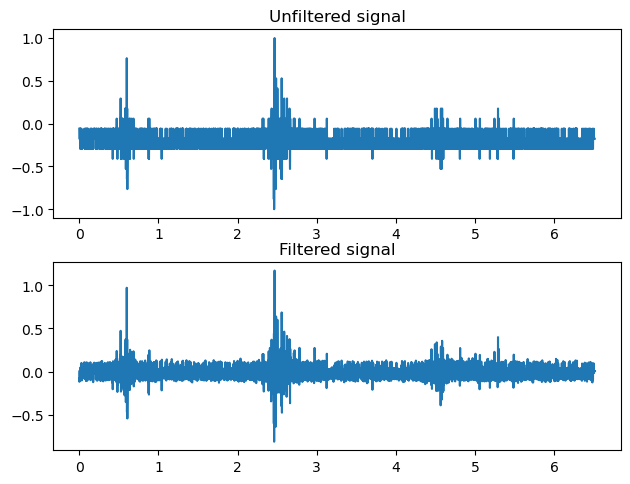

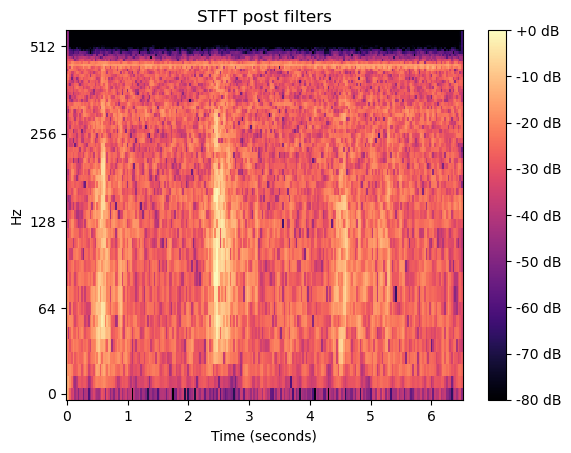

In [21]:
fig, axs = plt.subplots(len(data))
fig.tight_layout()
axs[0].plot(time_axis, data[0])
axs[0].set_title(f"Unfiltered signal")
axs[1].plot(time_axis, filtered_signal)
axs[1].set_title(f"Filtered signal")
plt.show()


NFFT = 128
stft_result = librosa.stft(filtered_signal, n_fft=NFFT)
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_result),
                                                       ref=np.max),
                               y_axis='log', x_axis='s', ax=ax, sr=SAMPLE_RATE,
                                n_fft=NFFT, hop_length=NFFT/4)
ax.set_title('STFT post filters')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

# Applying both on normalized signal

In [13]:
pre_filter_data = data

In [14]:
for a in range(len(pre_filter_data)):
  # as you want your data to be between -1 and 1, everything should be scaled to 2, 
  # if your desired min and max are other values, replace 2 with your_max - your_min
  ratio = 2 / (np.max(pre_filter_data[a]) - np.min(pre_filter_data[a])) 
  shift = (np.max(pre_filter_data[a]) + np.min(pre_filter_data[a])) / 2 
  # now you need to shift the center to the middle, this is not the average of the values.
  pre_filter_data[a] = (pre_filter_data[a] - shift) * ratio

In [15]:
LOW_CUTOFF = 16
HIGH_CUTOFF = 425

filtered_signal = highpass_filter(pre_filter_data[0], LOW_CUTOFF, SAMPLE_RATE)
filtered_signal = lowpass_filter(filtered_signal, HIGH_CUTOFF, SAMPLE_RATE)

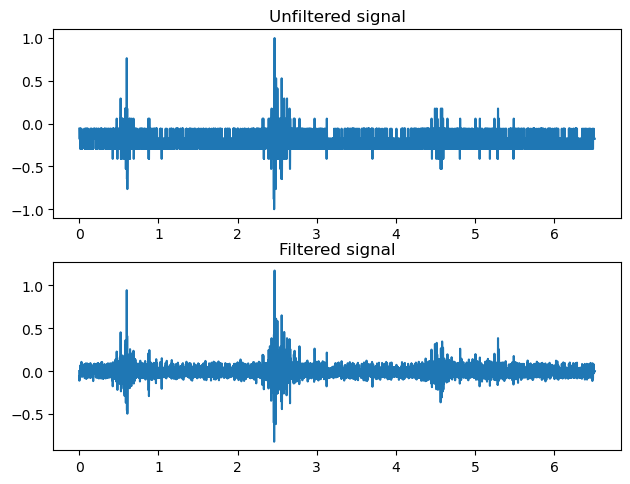

In [16]:
fig, axs = plt.subplots(2)
fig.tight_layout()
axs[0].plot(time_axis, pre_filter_data[0])
axs[0].set_title(f"Unfiltered signal")
axs[1].plot(time_axis, filtered_signal)
axs[1].set_title(f"Filtered signal")
plt.show()

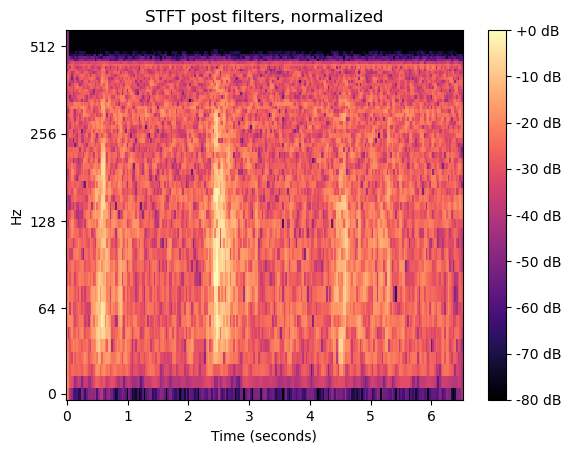

In [17]:
NFFT = 128
stft_result = librosa.stft(filtered_signal, n_fft=NFFT)
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_result),
                                                       ref=np.max),
                               y_axis='log', x_axis='s', ax=ax, sr=SAMPLE_RATE,
                                n_fft=NFFT, hop_length=NFFT/4)
ax.set_title('STFT post filters, normalized')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()